# Use simulated price to show the idea behind pair trading
## See slides for explanations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

from statsmodels.tsa.stattools import coint

# Set a seed value to make the experience reproducible
np.random.seed(42)




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
try:
    import statsmodels
    print("module 'statsmodels' is installed")
except ModuleNotFoundError:
    print("module 'statsmodels' is not installed")
    !pip install statsmodels
from statsmodels.tsa.stattools import coint

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

module 'statsmodels' is installed
module 'yfinance' is not installed
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 16.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Example: Pair Trading



For time Period :2009-01-01 to 2019-12-01
[*********************100%***********************]  10 of 10 completed
[[('BMO', 'C'), 0.0], [('BMO', 'TD'), 0.00414], [('BMO', 'USB'), 0.00471], [('BNS', 'C'), 0.01783], [('C', 'JPM'), 0.00373], [('C', 'LUV'), 5e-05], [('C', 'RY'), 0.0], [('C', 'TD'), 0.01723], [('RY', 'USB'), 0.00322]]


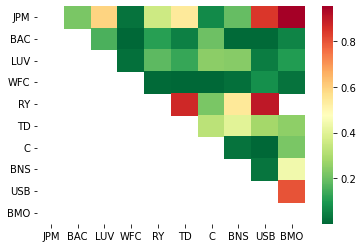



For time Period :2010-01-01 to 2020-01-01
[*********************100%***********************]  10 of 10 completed
[[('BMO', 'RY'), 0.00275], [('BMO', 'TD'), 0.00975], [('RY', 'TD'), 0.00792]]


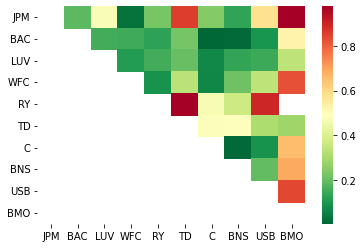



For time Period :2011-01-01 to 2021-01-01
[*********************100%***********************]  10 of 10 completed
[[('BAC', 'RY'), 0.00229], [('BAC', 'TD'), 0.00296], [('C', 'USB'), 0.01988]]


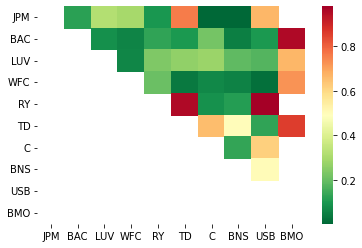



For time Period :2012-01-01 to 2022-01-01
[*********************100%***********************]  10 of 10 completed
[[('BAC', 'RY'), 0.00536], [('BAC', 'TD'), 0.00903]]


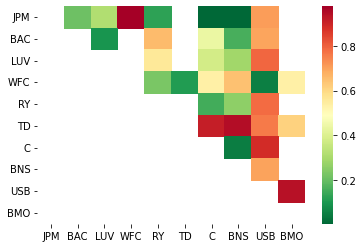

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

import seaborn



import yfinance as yf

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append([(keys[i], keys[j]),np.round(result[1],5)])
    return pvalue_matrix, pairs

tickers = ['JPM','BAC','LUV','WFC', 'RY','TD', 'C','BNS','USB','BMO']

start_date=['2009-01-01','2010-01-01','2011-01-01','2012-01-01']
end_date = ['2019-12-01','2020-01-01','2021-01-01','2022-01-01']

final_pairs = []
final_data = []

def diff_time_periods(tickers,start_date,end_date):
    for i in range(len(start_date)):
      print('\n')
      print('='*100)
      print(f'For time Period :{start_date[i]} to {end_date[i]}')
      print('='*100)

      data=yf.download(tickers,start_date[i], end_date[i]).dropna()
      final_data.append(data)

      pvalues, pairs = find_cointegrated_pairs(data['Adj Close'])
      print(pairs)
      final_pairs.append(pairs)

      sns_plot=seaborn.heatmap(pvalues, xticklabels=tickers,
                      yticklabels=tickers, cmap='RdYlGn_r',
                        mask = (pvalues >= 0.98))
      fig=sns_plot.get_figure()
      fig.savefig('correlation.jpg')
      plt.show()
diff_time_periods(tickers,start_date,end_date)

In [14]:
final_pairs

[[[('BMO', 'C'), 0.0],
  [('BMO', 'TD'), 0.00414],
  [('BMO', 'USB'), 0.00471],
  [('BNS', 'C'), 0.01783],
  [('C', 'JPM'), 0.00373],
  [('C', 'LUV'), 5e-05],
  [('C', 'RY'), 0.0],
  [('C', 'TD'), 0.01723],
  [('RY', 'USB'), 0.00322]],
 [[('BMO', 'RY'), 0.00275], [('BMO', 'TD'), 0.00975], [('RY', 'TD'), 0.00792]],
 [[('BAC', 'RY'), 0.00229], [('BAC', 'TD'), 0.00296], [('C', 'USB'), 0.01988]],
 [[('BAC', 'RY'), 0.00536], [('BAC', 'TD'), 0.00903]]]

In [4]:
final_pairs[3][1][0][0]

'BAC'

In [5]:
final_pairs[2][0][0][0]

'BAC'

# a. Implement the pair trading strategy (you can use any time-period). Choose different values for and compare the performance (PnL= Profit and Loss)

In [6]:
def  profit_calculation(final_pairs,final_data):

    profit_pairs = []
    profits = []
    for i in range(len(final_pairs)):
      data = final_data[i]

      Symbol1_prices = data['Adj Close'][final_pairs[i][0][0][0]]
      Symbol2_prices = data['Adj Close'][final_pairs[i][0][0][1]]

      profit_pairs.append(final_pairs[i][0][0])

      

      def zscore(series):
          return (series - series.mean()) / np.std(series)

      ratios = Symbol1_prices / Symbol2_prices

      symbol1_buy=Symbol1_prices.copy()
      symbol1_sell=Symbol1_prices.copy()
      symbol2_buy=Symbol2_prices.copy()
      symbol2_sell=Symbol2_prices.copy()

      symbol1_buy[zscore(ratios)>-1] = 0
      symbol1_sell[zscore(ratios)<1] = 0

      symbol2_buy[zscore(ratios)<1] = 0
      symbol2_sell[zscore(ratios)>-1] = 0

      pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
      pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
      pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
      pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
      pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
      pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))


      position=0
      for i in range(len(Symbol1_prices)):
          s1price=Symbol1_prices[i]
          s2price=Symbol2_prices[i]
          if not position and symbol1_buy[i]!=0:
              pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
              pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
              position=1
          elif not position and symbol1_sell[i]!=0:
              pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
              pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
              position = -1
          elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
              pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
              pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
              position = 0
          elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
              pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
              pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
              position = 0

      Symbol1_prices.plot(figsize=(12,7))
      pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
      pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
      Symbol2_prices.plot()
      pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
      pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")

      plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
      plt.show()


      #position
      #assume that we only buy/sell one share, regardless of the price deifference
      pair_correlation_trading_strategy['symbol1_position']=\
      pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

      pair_correlation_trading_strategy['symbol2_position']=\
      pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

      pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(15,10))
      pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(15,10))

      pair_correlation_trading_strategy['total_position']=\
      pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
      pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(12,7))
      plt.title("Symbol 1 and Symbol 2 positions")
      plt.legend()
      plt.show()
      profits.append(pair_correlation_trading_strategy['total_position'].cumsum()[-1])

    return profit_pairs, profits




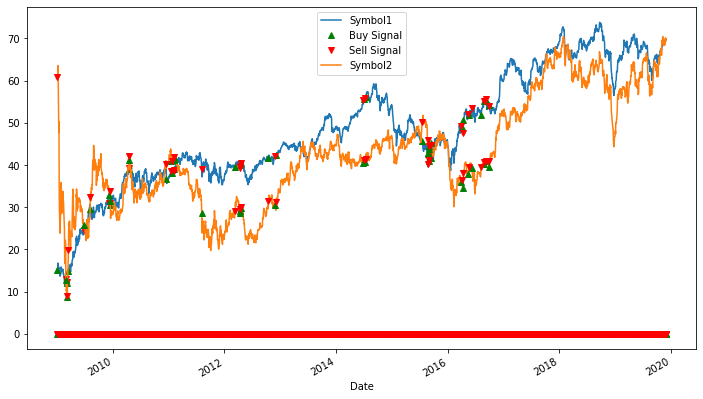

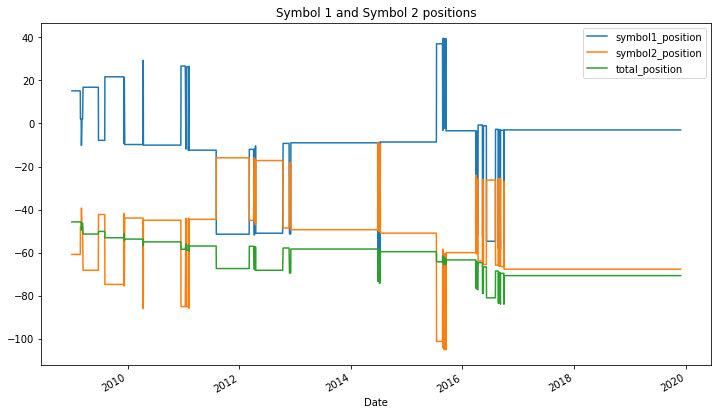

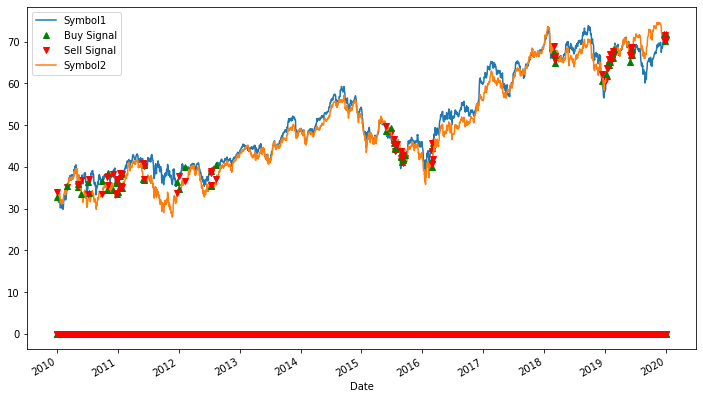

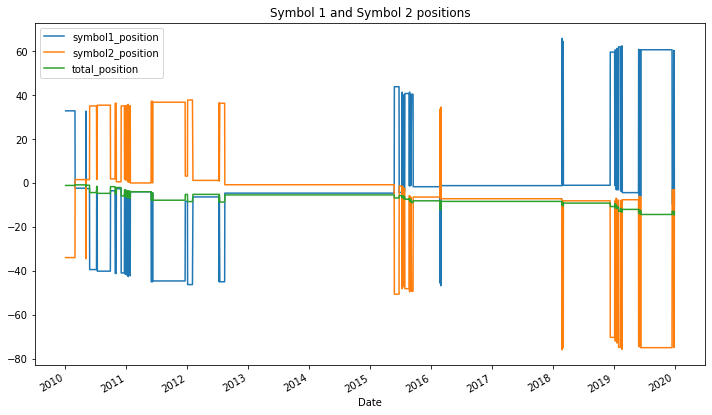

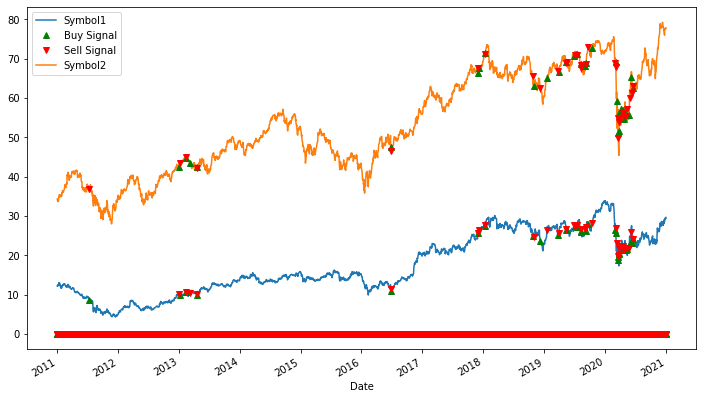

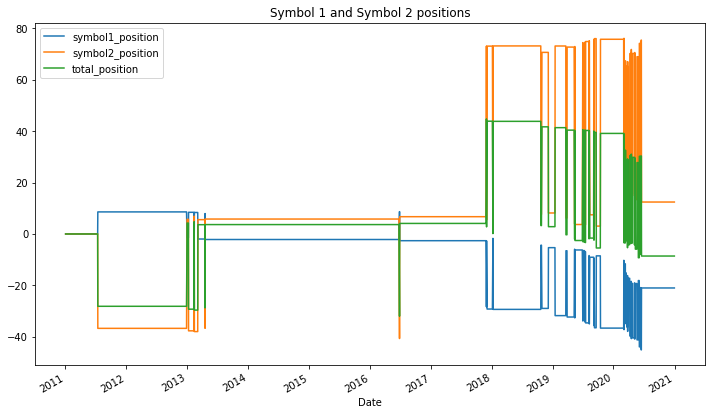

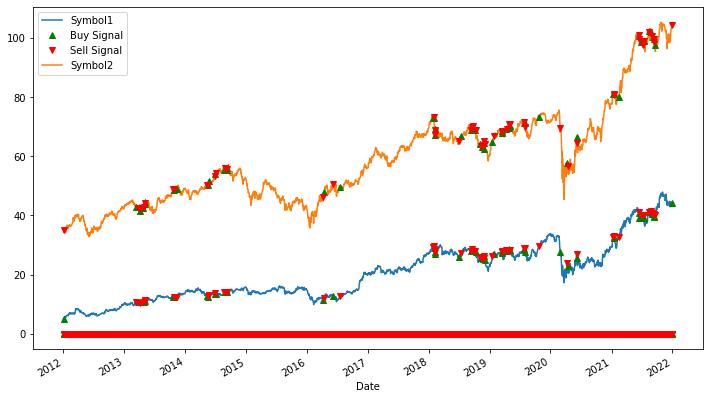

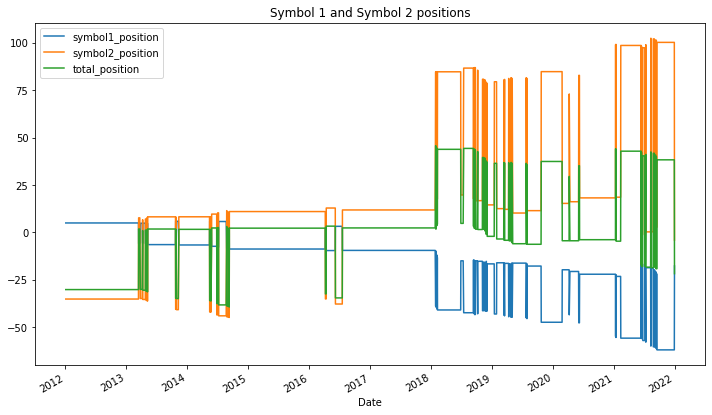

In [7]:
pairs, profits = profit_calculation(final_pairs,final_data)

In [8]:
pairs

[('BMO', 'C'), ('BMO', 'RY'), ('BAC', 'RY'), ('BAC', 'RY')]

In [9]:
profits

[-70.67387580871582,
 -13.10134506225586,
 -8.587949752807617,
 -21.751869201660156]

In [10]:
df = pd.DataFrame(list(zip(pairs,profits)),columns=['Highest Corr Pairs','Profits'])
df

,Highest Corr Pairs,Profits
0,"(BMO, C)",-70.673876
1,"(BMO, RY)",-13.101345
2,"(BAC, RY)",-8.587950
3,"(BAC, RY)",-21.751869


# b. Try the strategy to the pair that have the second highest correlation.

In [11]:
def  profit_calculation(final_pairs,final_data):

    profit_pairs = []
    profits = []
    for i in range(len(final_pairs)):
      data = final_data[i]

      Symbol1_prices = data['Adj Close'][final_pairs[i][1][0][0]]
      Symbol2_prices = data['Adj Close'][final_pairs[i][1][0][1]]

      profit_pairs.append(final_pairs[i][1][0])

      legend1 = final_pairs[i][1][0][0]
      legend2 = final_pairs[i][1][0][1]

      def zscore(series):
          return (series - series.mean()) / np.std(series)

      ratios = Symbol1_prices / Symbol2_prices

      symbol1_buy=Symbol1_prices.copy()
      symbol1_sell=Symbol1_prices.copy()
      symbol2_buy=Symbol2_prices.copy()
      symbol2_sell=Symbol2_prices.copy()

      symbol1_buy[zscore(ratios)>-1] = 0
      symbol1_sell[zscore(ratios)<1] = 0

      symbol2_buy[zscore(ratios)<1] = 0
      symbol2_sell[zscore(ratios)>-1] = 0

      pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
      pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
      pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
      pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
      pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
      pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))


      position=0
      for i in range(len(Symbol1_prices)):
          s1price=Symbol1_prices[i]
          s2price=Symbol2_prices[i]
          if not position and symbol1_buy[i]!=0:
              pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
              pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
              position=1
          elif not position and symbol1_sell[i]!=0:
              pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
              pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
              position = -1
          elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
              pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
              pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
              position = 0
          elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
              pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
              pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
              position = 0

      Symbol1_prices.plot(figsize=(12,7))
      pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
      pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
      Symbol2_prices.plot()
      pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
      pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")

      plt.legend([legend1, "Buy Signal", "Sell Signal",legend2])
      plt.show()


      #position
      #assume that we only buy/sell one share, regardless of the price deifference
      pair_correlation_trading_strategy['symbol1_position']=\
      pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

      pair_correlation_trading_strategy['symbol2_position']=\
      pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

      pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(15,10))
      pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(15,10))

      pair_correlation_trading_strategy['total_position']=\
      pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
      pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(12,7))
      plt.title("Symbol 1 and Symbol 2 positions")
      plt.legend()
      plt.show()
      profits.append(pair_correlation_trading_strategy['total_position'].cumsum()[-1])

    return profit_pairs, profits




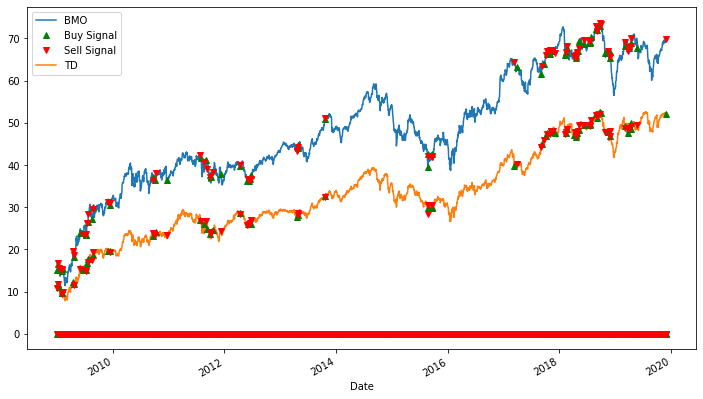

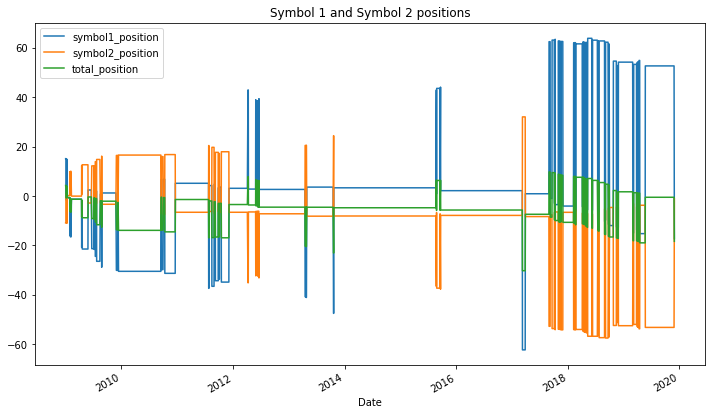

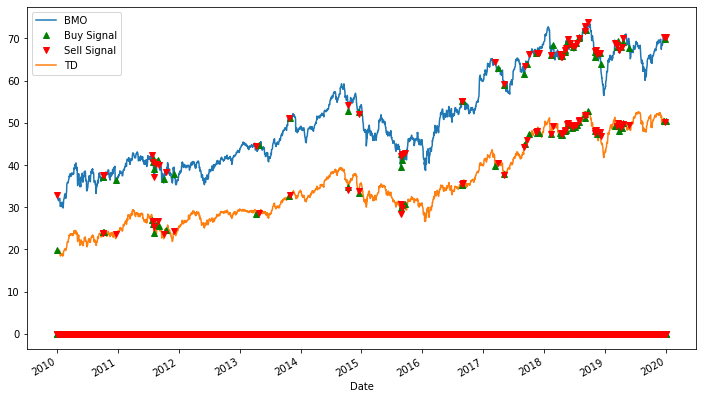

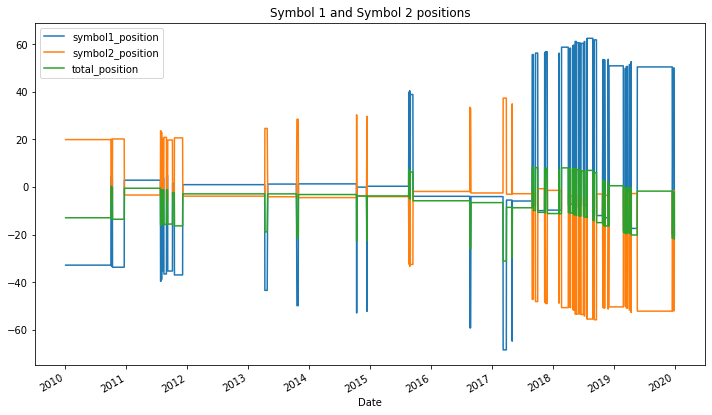

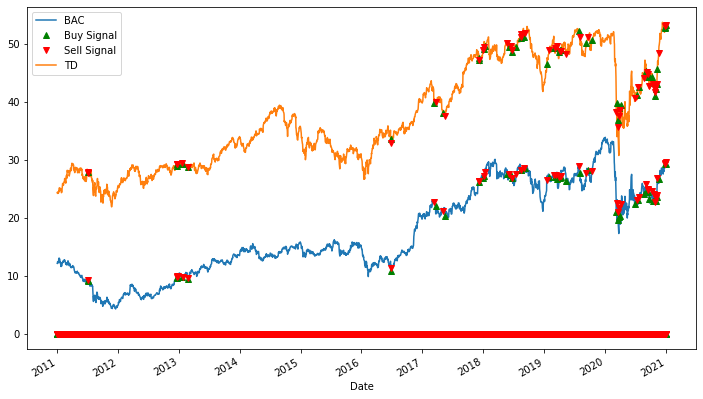

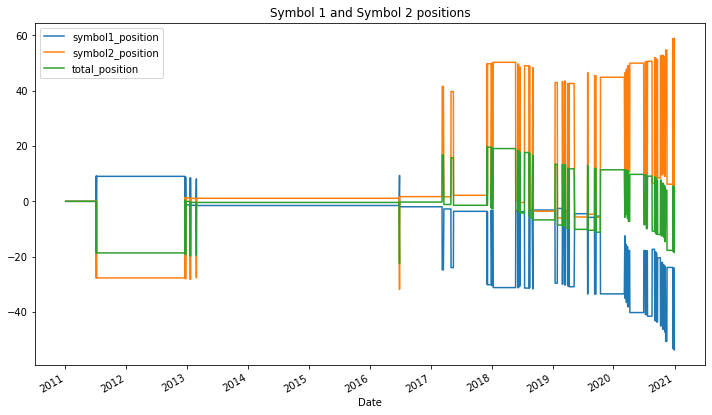

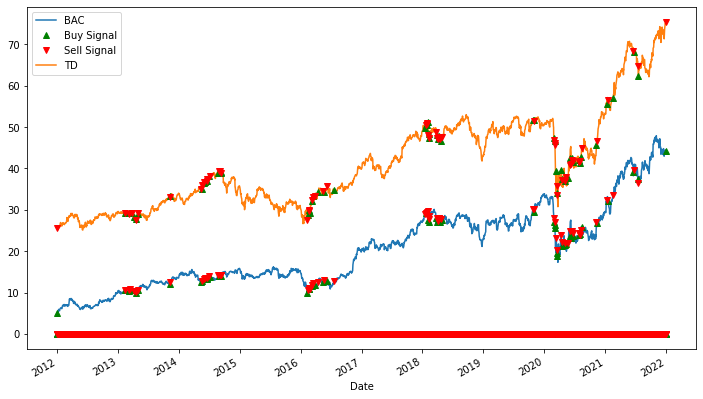

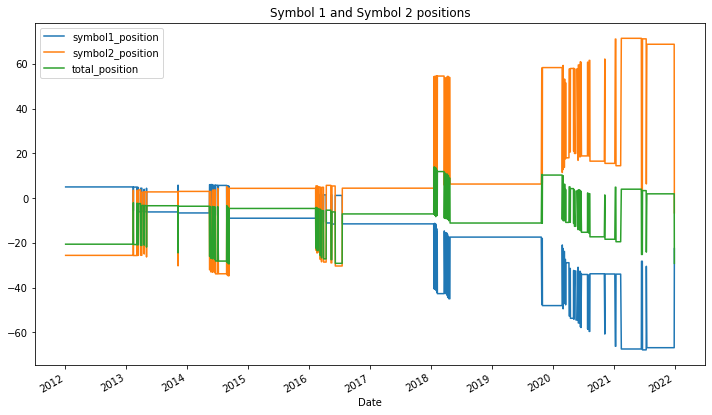

In [12]:
pairs, profits = profit_calculation(final_pairs,final_data)

In [13]:
df = pd.DataFrame(list(zip(pairs,profits)),columns=['Highest Corr Pairs','Profits'])
df

,Highest Corr Pairs,Profits
0,"(BMO, TD)",-18.303931
1,"(BMO, TD)",-21.875292
2,"(BAC, TD)",5.229116
3,"(BAC, TD)",-29.131623
